In [152]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import sklearn
import pandas as pd

import os
import sys
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [158]:
max_features = 20000
imdb = keras.datasets.imdb 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words = max_features )
# max_features 數據字的個數 前10000個會被保留 其他的被特殊字處理

 # 文字字典
#word -> id
word_index  = imdb.get_word_index()
#id -> word 
word_index = dict( [ ( b+3 , a ) for a , b in word_index.items() ] )
word_index[0] = '<PAD>'      # padding时用来填充的字
word_index[1] = '<START>'    # 句子開始
word_index[2] = '<UNK>'      # 無法識別的字
word_index[3] = '<END>'      # 結束字符


In [159]:
def decode_review( text_ids ) : 
    return " ".join( [ word_index.get( x , "<UNK>") for x in text_ids ] )

decode_review( train_data[0] )

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be 

In [160]:
max_length = 100 #字數限制 最多100 多的變成 '<PAD>' 的值 
batch_size = 32

print( train_data.shape )

#處理 train 資料
train_data = tf.keras.preprocessing.sequence.pad_sequences( 
    train_data ,       # 數據名稱
    value =  0 ,       # 要補充的值 
    padding = 'post' , # padding的顺序：post : padding放到句子的後面, pre: padding放到句子的前面
    maxlen = max_length )

#處理 test 資料
test_data = tf.keras.preprocessing.sequence.pad_sequences( 
    test_data ,        # 數據名稱
    value =  0 ,       # 要補充的值 
    padding = 'post' , # padding的顺序：post : padding放到句子的後面, pre: padding放到句子的前面
    maxlen = max_length )

print( train_data.shape )

(25000,)
(25000, 100)


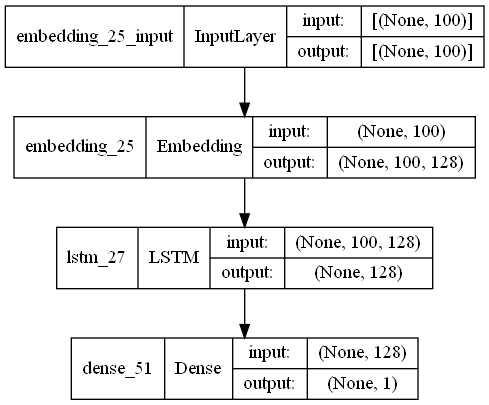

In [157]:
embedding_dim = 16  # 每个word embedding成一个长度为16的向量
batch_size = 512    # 每个batch的长度
model = tf.keras.Sequential()

model.add( layers.Embedding( max_features , 128 , input_length = max_length ) ) 

model.add( layers.LSTM( units = 128 , dropout = 0.2 , recurrent_dropout = 0.2 ) ) 
model.add( layers.Dense( 1 , activation = 'sigmoid' ) )
tf.keras.utils.plot_model( model , show_shapes = True )

In [161]:
model.compile( optimizer = "adam" ,
               loss = "binary_crossentropy" , 
               metrics = [ 'accuracy' ] )
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 100, 128)          2560000   
                                                                 
 lstm_27 (LSTM)              (None, 128)               131584    
                                                                 
 dense_51 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [162]:
model.fit( train_data , train_labels , batch_size = batch_size , epochs = 15 ,  validation_data = ( test_data , test_labels ) )
score, acc = model.evaluate( test_data , test_labels , batch_size = batch_size )
print('Test score:   ' , score)
print('Test accuracy:' , acc  )

Epoch 1/15
782/782 [==============================] - 116s 146ms/step - loss: 0.4317 - accuracy: 0.7975 - val_loss: 0.3627 - val_accuracy: 0.8489
Epoch 2/15
782/782 [==============================] - 112s 144ms/step - loss: 0.2485 - accuracy: 0.9054 - val_loss: 0.4120 - val_accuracy: 0.8351
Epoch 3/15
782/782 [==============================] - 112s 144ms/step - loss: 0.1651 - accuracy: 0.9412 - val_loss: 0.4176 - val_accuracy: 0.8410
Epoch 4/15
782/782 [==============================] - 113s 145ms/step - loss: 0.1109 - accuracy: 0.9619 - val_loss: 0.5784 - val_accuracy: 0.8301
Epoch 5/15
782/782 [==============================] - 113s 145ms/step - loss: 0.0817 - accuracy: 0.9731 - val_loss: 0.5589 - val_accuracy: 0.8300
Epoch 6/15
782/782 [==============================] - 114s 145ms/step - loss: 0.0624 - accuracy: 0.9799 - val_loss: 0.5568 - val_accuracy: 0.8210
Epoch 7/15
782/782 [==============================] - 113s 145ms/step - loss: 0.0422 - accuracy: 0.9870 - val_loss: 0.8866 -

In [163]:
#==== 別人的 ====

In [151]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/15
782/782 [==============================] - 131s 166ms/step - loss: 0.4207 - accuracy: 0.8029 - val_loss: 0.3768 - val_accuracy: 0.8348
Epoch 2/15
782/782 [==============================] - 133s 170ms/step - loss: 0.2585 - accuracy: 0.8960 - val_loss: 0.3687 - val_accuracy: 0.8370
Epoch 3/15
782/782 [==============================] - 145s 185ms/step - loss: 0.1672 - accuracy: 0.9363 - val_loss: 0.4299 - val_accuracy: 0.8262
Epoch 4/15
782/782 [==============================] - 138s 177ms/step - loss: 0.1110 - accuracy: 0.9598 - val_loss: 0.4710 - val_accuracy: 0.8184
Epoch 5/15
782/782 [==============================] - 135s 173ms/step - loss: 0.0803 - accuracy: 0.9724 - val_loss: 0.6501 - val_accuracy: 0.8223
Epoch 6/15
782/782 [==============================] - 118s 150ms/step - loss: 0.0556 - accuracy: 0.9800